In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
#dropping serial no. as it is not required for our analaysis
df.drop('Serial No.',axis=1,inplace= True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
#replacing spaces between the names of the columns with underscores
new_column_names = {col: col.replace(' ', '_') for col in df.columns}

# Use the rename() function to update the column names
df.rename(columns=new_column_names, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR_               500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit_   500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


No null values found in the data

In [7]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
#cheking for outliers

def calculate_outliers(dataset):
    outliers = {}  # Dictionary to store outliers for each column

    for column in dataset.columns:
        values = dataset[column]
        quartile_1 = values.quantile(0.25)
        quartile_3 = values.quantile(0.75)
        iqr = quartile_3 - quartile_1

        lower_bound = quartile_1 - 1.5 * iqr
        upper_bound = quartile_3 + 1.5 * iqr

        column_outliers = values[(values < lower_bound) | (values > upper_bound)]
        outliers[column] = column_outliers.tolist()

    return outliers


In [9]:
df[df["LOR_"] == 1]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
347,299,94,1,1.0,1.0,7.34,0,0.42


In [10]:
df[df["Chance_of_Admit_"] == 0.34]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


There are very less outliers compared to the sample so we can ignore the outliers

In [11]:
outliers = calculate_outliers(df)
outliers

{'GRE_Score': [],
 'TOEFL_Score': [],
 'University_Rating': [],
 'SOP': [],
 'LOR_': [1.0],
 'CGPA': [],
 'Research': [],
 'Chance_of_Admit_': [0.34, 0.34]}

In [12]:
#check for duplicate rows  in the dataframe

duplicate_rows = df.duplicated()

num_duplicate_rows = duplicate_rows.sum()

num_duplicate_rows

0

#### Checking for normal distrubtion within the  features 

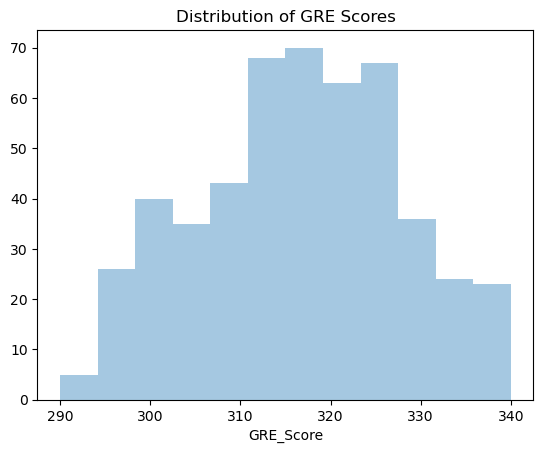

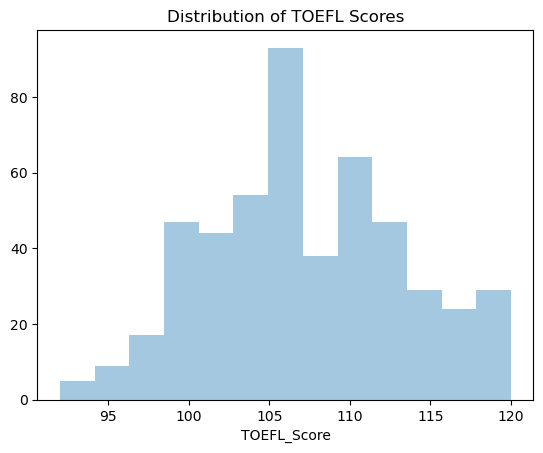

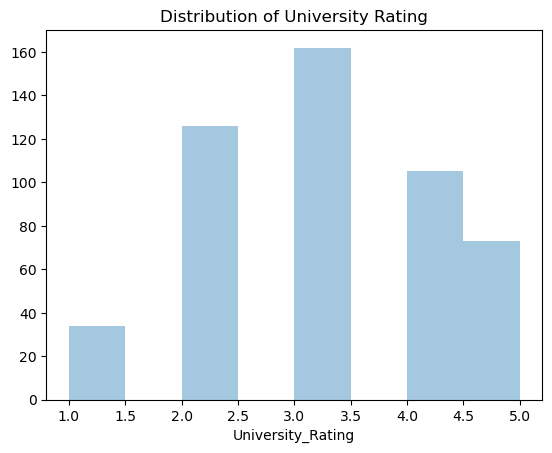

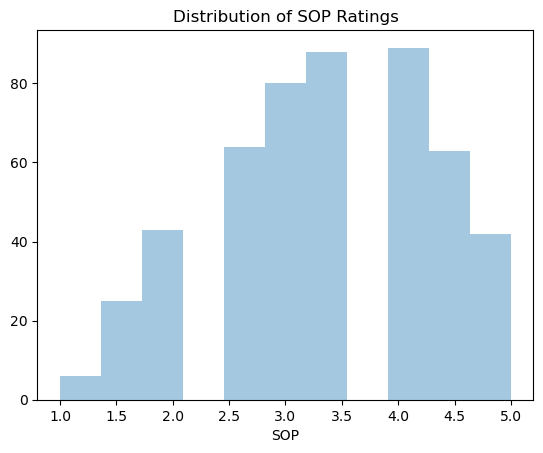

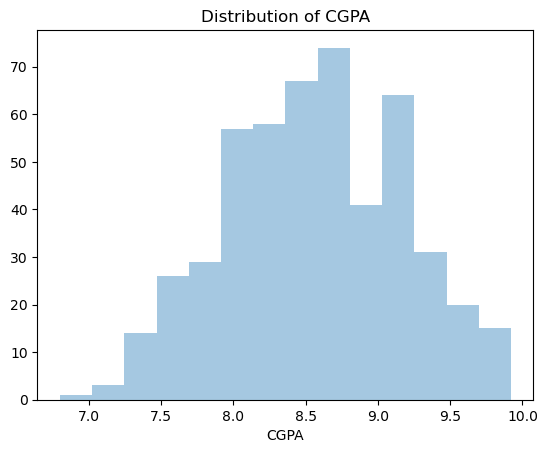

In [13]:
fig = sns.distplot(df['GRE_Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()
fig = sns.distplot(df['TOEFL_Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()
fig = sns.distplot(df['University_Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

##### It is clear from the distributions, students with varied merit apply for the university.


### Understanding the relation between different factors responsible for graduate admissions

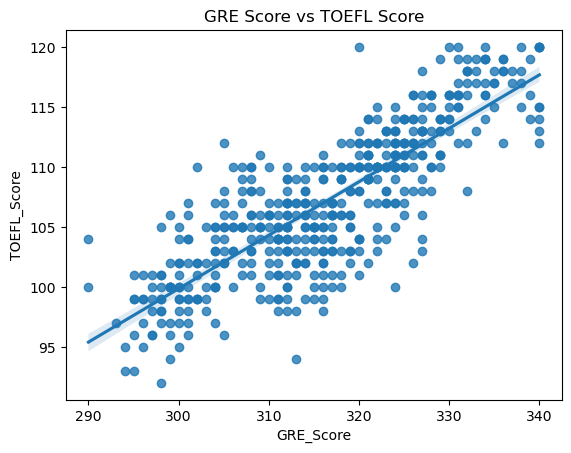

In [14]:
fig = sns.regplot(x="GRE_Score", y="TOEFL_Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()


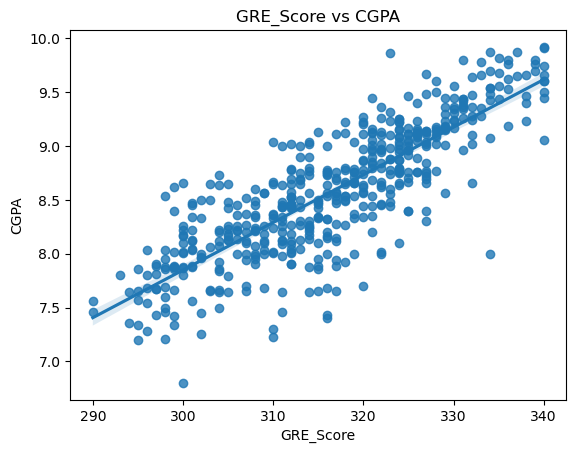

In [15]:
fig = sns.regplot(x="GRE_Score", y="CGPA", data=df)
plt.title("GRE_Score vs CGPA")
plt.show()

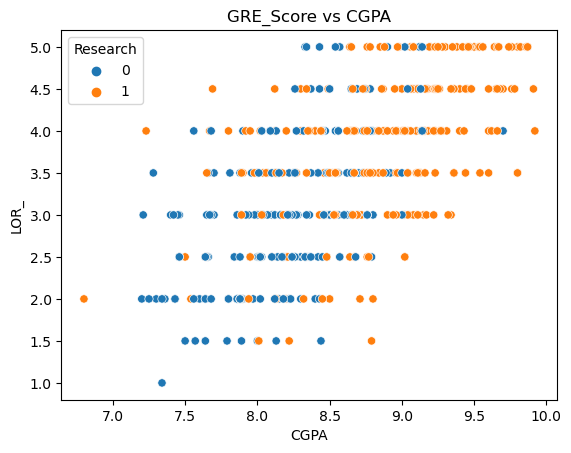

In [16]:
fig = sns.scatterplot(x="CGPA", y="LOR_", data=df, hue="Research")
plt.title("GRE_Score vs CGPA")
plt.show()


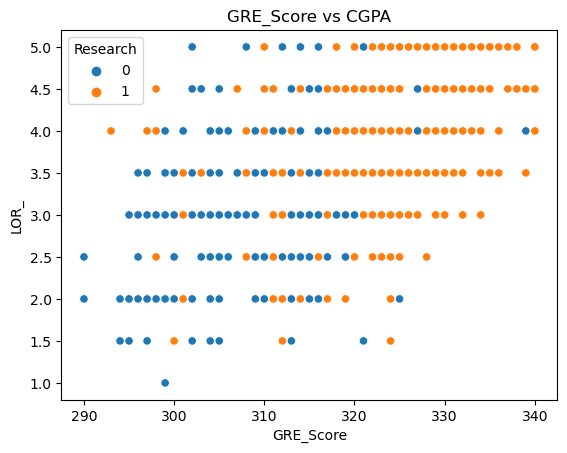

In [17]:
fig = sns.scatterplot(x="GRE_Score", y="LOR_", data=df, hue="Research")
plt.title("GRE_Score vs CGPA")
plt.show()

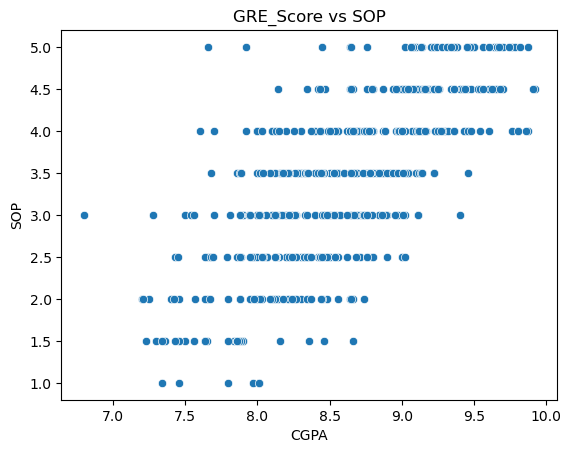

In [18]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE_Score vs SOP")
plt.show()

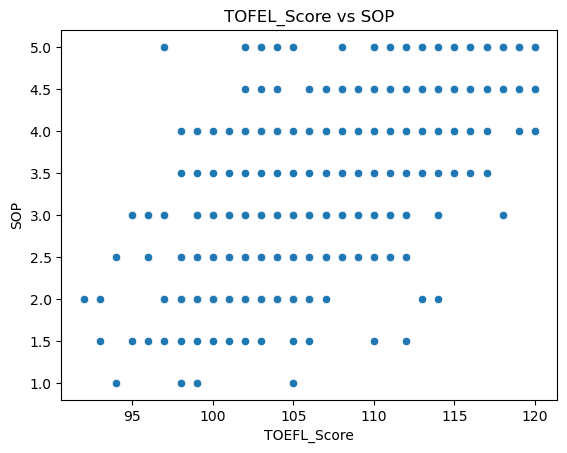

In [19]:
fig = sns.scatterplot(x="TOEFL_Score", y="SOP", data=df)
plt.title("TOFEL_Score vs SOP")
plt.show()


<Axes: >

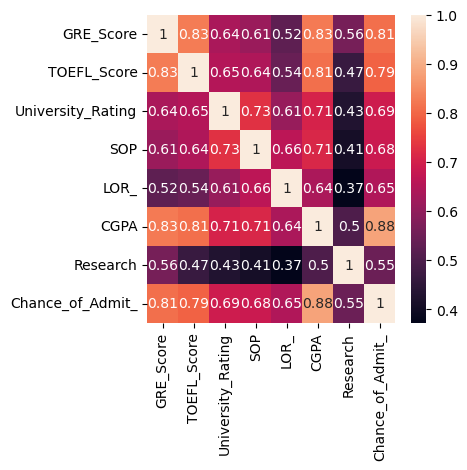

In [20]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True)

#### Lets split the dataset with training and testing set and prepare the inputs and ouput

### Linear Regression using Sklearn

In [21]:


from sklearn.model_selection import train_test_split

X = df.drop(['Chance_of_Admit_'], axis=1)
y = df['Chance_of_Admit_']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)

In [23]:
X_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
63,315,107,2,4.0,3.0,8.50,1
301,319,108,2,2.5,3.0,8.76,0
85,319,103,4,4.5,3.5,8.66,0
65,325,112,4,3.5,3.5,8.92,0
180,300,104,3,3.5,3.0,8.16,0
...,...,...,...,...,...,...,...
421,321,112,3,3.0,4.5,8.95,1
302,322,105,2,3.0,3.0,8.45,1
476,304,104,3,2.5,2.0,8.12,0
456,299,100,2,2.0,2.0,7.88,0


In [24]:
y_train

63     0.56
301    0.66
85     0.76
65     0.55
180    0.71
       ... 
421    0.77
302    0.65
476    0.62
456    0.51
102    0.62
Name: Chance_of_Admit_, Length: 400, dtype: float64

In [25]:
#Standardization-- helps in giving accurate results

from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [26]:
X_train_std

array([[-0.11088337,  0.01634192, -0.94289333, ..., -0.554274  ,
        -0.09619899,  0.87744601],
       [ 0.2383556 ,  0.17976112, -0.94289333, ..., -0.554274  ,
         0.33653005, -1.13967126],
       [ 0.2383556 , -0.63733488,  0.82779837, ...,  0.        ,
         0.1700958 , -1.13967126],
       ...,
       [-1.07129055, -0.47391568, -0.05754748, ..., -1.66282199,
        -0.72864913, -1.13967126],
       [-1.50783926, -1.12759249, -0.94289333, ..., -1.66282199,
        -1.12809132, -1.13967126],
       [-0.19819312, -0.14707728, -0.94289333, ...,  0.        ,
        -0.51228461, -1.13967126]])

In [27]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [28]:
X_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
0,-0.110883,0.016342,-0.942893,0.657359,-0.554274,-0.096199,0.877446
1,0.238356,0.179761,-0.942893,-0.856712,-0.554274,0.336530,-1.139671
2,0.238356,-0.637335,0.827798,1.162050,0.000000,0.170096,-1.139671
3,0.762214,0.833438,0.827798,0.152669,0.000000,0.602825,-1.139671
4,-1.420530,-0.473916,-0.057547,0.152669,-0.554274,-0.662075,-1.139671
...,...,...,...,...,...,...,...
395,0.412975,0.833438,-0.057547,-0.352022,1.108548,0.652755,0.877446
396,0.500285,-0.310496,-0.942893,-0.352022,-0.554274,-0.179416,0.877446
397,-1.071291,-0.473916,-0.057547,-0.856712,-1.662822,-0.728649,-1.139671
398,-1.507839,-1.127592,-0.942893,-1.361403,-1.662822,-1.128091,-1.139671


Lets use a bunch of different algorithms to see which model performs better

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
models = [
           ['Linear Regression :', LinearRegression()],
         
          ['Lasso Regression :', Lasso(alpha=0.1)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]
print("Results without removing features with multicollinearity ...")

for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name,"MSE", (np.sqrt(mean_squared_error(y_test, predictions))))
   


Results without removing features with multicollinearity ...
Linear Regression : MSE 0.06594977961804155
Lasso Regression : MSE 0.12708296741692704
Ridge Regression : MSE 0.0659109609848945


#### We can see that the error in MAE is high compared to MSE

### Linear Regression using Statsmodel library

In [30]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          2.25e-145
Time:                        23:53:51   Log-Likelihood:                 572.33
No. Observations:                 400   AIC:                            -1129.
Df Residuals:                     392   BIC:                            -1097.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7181      0.00

In [31]:
# Dropping 'sop' column here as it has less weightage and is also statistically insignificant
# either we can drop after checking p value or we can proceed with VIF 

X_train_new=X_train.drop(columns='SOP')

In [32]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     314.5
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.22e-146
Time:                        23:53:51   Log-Likelihood:                 572.32
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     393   BIC:                            -1103.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7181      0.00

In [33]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# performing VIF to check for multicollinearity


def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif


In [35]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE_Score,4.512301
2,TOEFL_Score,3.766646
3,University_Rating,2.251831
4,LOR_,1.902800
5,CGPA,4.429282
6,Research,1.489888


VIF looks fine and hence, we can go ahead with the predictions


In [36]:
X_test_std= std.transform(X_test)

In [37]:
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) 

In [38]:
X_test = sm.add_constant(X_test)


In [39]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [40]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [41]:
X_test_new=X_test.drop(columns=X_test_del)


In [42]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

In [43]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.047009437275651614
Root Mean Square Error  0.06592263916249283


### Mean of Residuals


In [44]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.0010153645302608172


### Test for Homoscedasticity

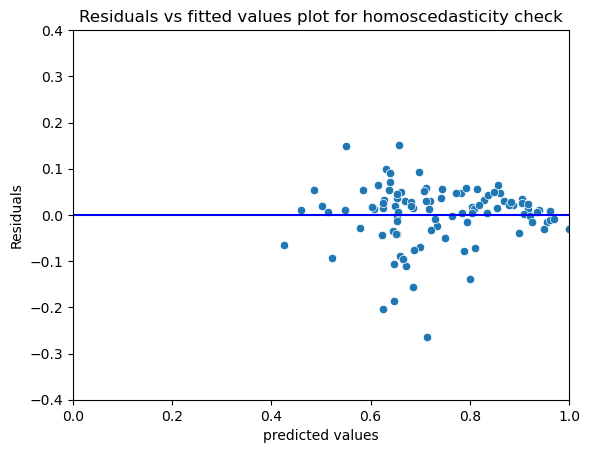

In [45]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [46]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)
### Here null hypothesis is - error terms are homoscedastic and since p-values < 0.05, we reject the null hypothesis


[('F statistic', 1.4446701689661456), ('p-value', 0.11866219406726086)]

Therefore there is no homscedasticity

### Normality of residuals


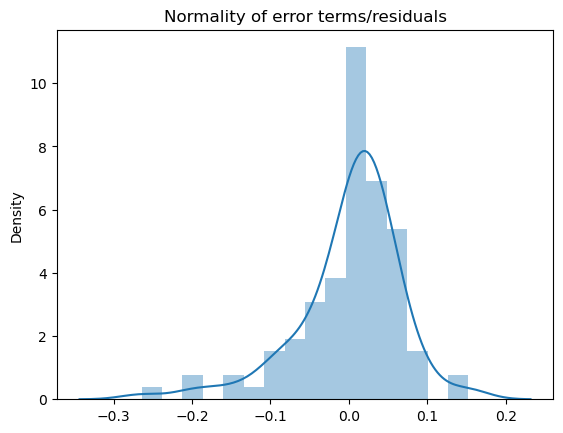

In [47]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')


Text(0, 0.5, 'y_pred')

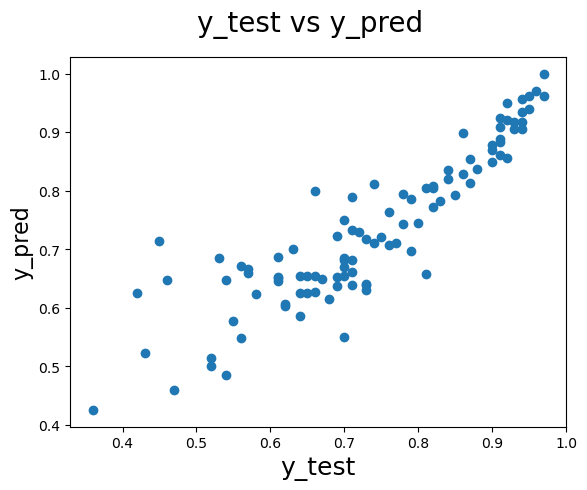

In [48]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label